Proyek Akhir MBKM Orbit

Anggota Kelompok:

1. Halomoan Filipus Simarmata (Jupyter XXI)
2. Nyayu Chika Marselina (Jupyter XXI)
3. Athiya Shinta Wulandari (Cordoba)
4. Sukma Imelda (Cordoba)
5. Wella Novita Andriani (Cordoba)

**Problem Scooping**
1. Who : masyarakat dan khususnya wisatawan asing

2. What : Ketertinggalan kue tradisional Indonesia dibandingkan kue-kue modern saat ini apalagi kue-kue modern memiliki proses pembuatan yang lebih efisien dan mudah didapatkan daripada kue tradisional sehingga memiliki kemungkinan bahwa kedepannya kue tradisional Indonesia tidak banyak diketahui oleh masyarakat.

3. Where: pada saat masyarakat yang berada di dalam maupun di luar Indonesia membutuhkan informasi mengenai kue tradisional indonesia

4. Why : nilai utama dari permasalahan ini adalah membantu menyalurkan informasi mengenai kue tradisional Indonesia

**Data Acquisition:**
Data diperoleh dari Kaggle (https://www.kaggle.com/datasets/ilhamfp31/kue-indonesia) berjumlah 1845 data dimana terdapat data testing sebanyak 162 data, data training sebanyak 1523 data, data validation sebanyak 160 data.

**Data Exploration:**
Data berupa kumpulan foto kue tradisional Indonesia dari 8 kelas yang terdiri dari kue klepon, kue lumpur, kue kastengel, kue putri salju, kue serabi, kue lapis, kue risoles, dan kue dadar gulung dengan jumlah pada setiap kelas adalah 240 data, 238 data, 223 data, 214 data, 221 data, 241 data, 236 data, dan 232 data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
path = "/content/drive/MyDrive/kue-indonesia-augmentasi"

In [ ]:
filename = glob.glob(path+"/*/*.jpg")

In [ ]:
filename

['/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_0.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_1.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_2.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_3.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_4.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_5.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_6.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_7.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_8.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_9.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_10.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue

In [ ]:
#Lihat 1 data gambar duru, untuk tau ukuran atau nilai gambar
import cv2 as cv
img = cv.imread(filename[0]) 
img.shape

(360, 480, 3)

In [ ]:
#Baca data di variabel filename
import os
import numpy as np
def read_data(filename):
  labels = [] #jumlah label
  images = [] #jumlah gambar
  #Hasilnya ada 30 label dan 30 gambar
  for i in filename: #perulangan sebanyak data yang ada di folder
    label = os.path.dirname(i) #ngambil semua data sesuai labelnya
    labels.append(os.path.basename(label)) #dapat label, masukkin ke labels
    img = cv.imread(i) #ini juga, ambil data image 
    img = cv.resize(img,(200,200)) #ubah ukuran 240x240 jadi 200x200 disimpan di 'images'
    images.append(img)
  images = np.asarray(images)
  return(images, labels) #balikin nilai

In [ ]:
images,labels = read_data(filename) #ngambil dari fungsi

In [ ]:
images.shape #cek chape images

(5277, 200, 200, 3)

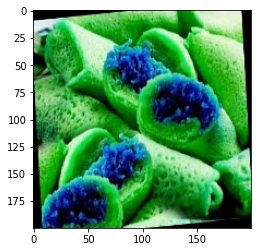

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0],cmap="bone")

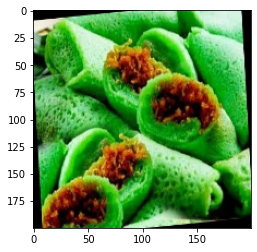

In [ ]:
import matplotlib.pyplot as py
import cv2 as cv
images_rgb = []
for i in range(images.shape[0]):
  im_rgb = cv.cvtColor(images[i],cv.COLOR_BGR2RGB) #convert BGR diubah jadi RGB
  images_rgb.append(im_rgb)

images_rgb = np.asarray(images_rgb)
plt.imshow(images_rgb[0],cmap="bone")

#Outputnya sama kek yg di dataset

In [ ]:
images.shape[0] == len(labels)
#Jumlah gambar sama jumlah label sama ngga

True

In [ ]:
images.shape[1:4]

(200, 200, 3)

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(labels)
y = lb.transform(labels)

In [ ]:
y

array([0, 0, 0, ..., 7, 7, 7])

In [ ]:
y.shape #bandingin antara yg ini sama yg setelah ini

(5277,)

In [ ]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(np.expand_dims(y, -1))
yoh = enc.transform(np.expand_dims(y,-1)).toarray()

In [ ]:
yoh.shape

(5277, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,yoh, test_size=0.2, random_state=42)

#VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(200, 200, 3))
base_vgg_model.trainable = False

# Preprocessing Input
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
# Transfer learning dengan VGG16
vgg_model = tf.keras.models.Sequential([
  base_vgg_model,
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(8, activation='softmax')
])

# Compiling model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Melatih model VGG16
vgg_hist = vgg_model.fit(
    x_train,y_train,epochs=50,
              batch_size=64, verbose=1,
              validation_split=0.3
)

Epoch 1/50
47/47 [==============================] - 35s 445ms/step - loss: 5.6002 - accuracy: 0.3345 - val_loss: 1.5572 - val_accuracy: 0.4262
Epoch 2/50
47/47 [==============================] - 16s 347ms/step - loss: 1.4708 - accuracy: 0.5139 - val_loss: 1.1693 - val_accuracy: 0.6298
Epoch 3/50
47/47 [==============================] - 16s 353ms/step - loss: 1.0773 - accuracy: 0.6689 - val_loss: 0.7689 - val_accuracy: 0.7711
Epoch 4/50
47/47 [==============================] - 17s 361ms/step - loss: 0.8542 - accuracy: 0.7400 - val_loss: 0.7030 - val_accuracy: 0.7814
Epoch 5/50
47/47 [==============================] - 17s 370ms/step - loss: 0.6256 - accuracy: 0.8064 - val_loss: 0.5743 - val_accuracy: 0.8279
Epoch 6/50
47/47 [==============================] - 18s 376ms/step - loss: 0.5378 - accuracy: 0.8382 - val_loss: 0.5066 - val_accuracy: 0.8398
Epoch 7/50
47/47 [==============================] - 18s 375ms/step - loss: 0.4866 - accuracy: 0.8615 - val_loss: 0.5304 - val_accuracy: 0.8524

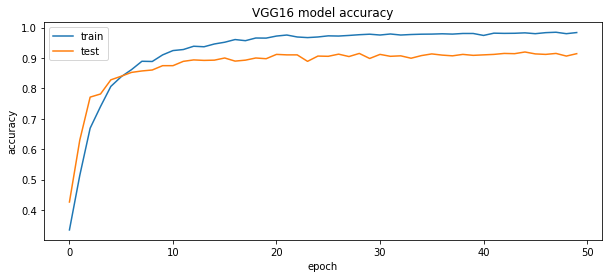

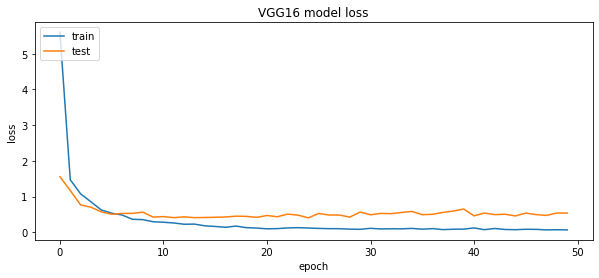

In [ ]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

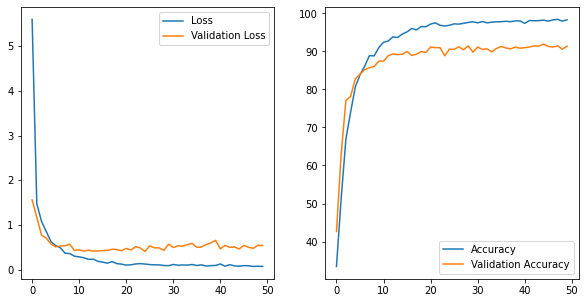

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(vgg_hist.history['loss'], '-', label = 'Loss')
ax1.plot(vgg_hist.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(vgg_hist.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(vgg_hist.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

In [ ]:
pred = vgg_model.predict(x_test)

In [ ]:
pred = np.argmax(pred,axis=1)

In [ ]:
pred.shape

(1056,)

In [ ]:
y_test.shape #(jumlahdata, jumlahkelas)

(1056, 8)

In [ ]:
y_test=np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[120,   1,   2,  10,   0,   0,   7,   7],
       [  0, 128,   0,   0,   2,   0,   2,   0],
       [  0,   1, 130,   0,   0,   3,   0,   1],
       [  1,   1,   0, 129,   0,   0,   2,   1],
       [  3,   2,   0,   1, 118,   1,   1,   4],
       [  0,   6,   1,   0,   3, 100,   0,   4],
       [  0,   3,   0,   1,   2,   2, 123,   4],
       [  2,   3,   0,   1,   8,   2,   0, 113]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=lb.classes_))

                  precision    recall  f1-score   support

kue_dadar_gulung       0.95      0.82      0.88       147
   kue_kastengel       0.88      0.97      0.92       132
      kue_klepon       0.98      0.96      0.97       135
       kue_lapis       0.91      0.96      0.93       134
      kue_lumpur       0.89      0.91      0.90       130
 kue_putri_salju       0.93      0.88      0.90       114
     kue_risoles       0.91      0.91      0.91       135
      kue_serabi       0.84      0.88      0.86       129

        accuracy                           0.91      1056
       macro avg       0.91      0.91      0.91      1056
    weighted avg       0.91      0.91      0.91      1056



#ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

# Loading ResNet50 model
base_resnet_model = ResNet50(include_top=False,
                   input_shape=(200,200,3),
                   pooling='max',classes=8,
                   weights='imagenet')

base_resnet_model.trainable = False

# Transfer learning ResNet50
resnet_model = tf.keras.models.Sequential([
    base_resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(8, activation="softmax")
])


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
base_resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Compiling model
resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Melatih model ResNet50
resnet_hist = resnet_model.fit(
    x_train,y_train,epochs=50,
              batch_size=64, verbose=1,
              validation_split=0.3
)

Epoch 1/50
47/47 [==============================] - 19s 311ms/step - loss: 2.8076 - accuracy: 0.3876 - val_loss: 0.9345 - val_accuracy: 0.6669
Epoch 2/50
47/47 [==============================] - 11s 243ms/step - loss: 0.6785 - accuracy: 0.7752 - val_loss: 0.5624 - val_accuracy: 0.8106
Epoch 3/50
47/47 [==============================] - 11s 240ms/step - loss: 0.4657 - accuracy: 0.8470 - val_loss: 0.4965 - val_accuracy: 0.8382
Epoch 4/50
47/47 [==============================] - 11s 237ms/step - loss: 0.2984 - accuracy: 0.9032 - val_loss: 0.3813 - val_accuracy: 0.8777
Epoch 5/50
47/47 [==============================] - 11s 237ms/step - loss: 0.1923 - accuracy: 0.9404 - val_loss: 0.3394 - val_accuracy: 0.8998
Epoch 6/50
47/47 [==============================] - 11s 235ms/step - loss: 0.1385 - accuracy: 0.9584 - val_loss: 0.3158 - val_accuracy: 0.8927
Epoch 7/50
47/47 [==============================] - 11s 235ms/step - loss: 0.0976 - accuracy: 0.9743 - val_loss: 0.2855 - val_accuracy: 0.9069

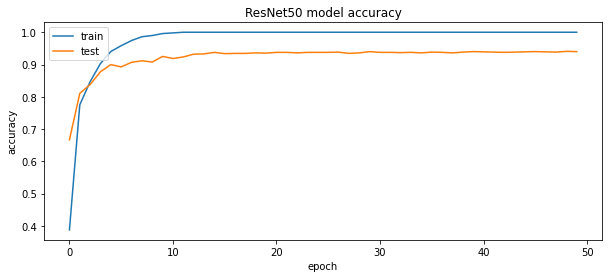

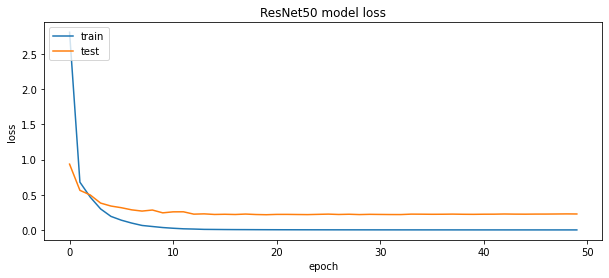

In [ ]:
# Membuat plot akurasi model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print()

# Membuat plot loss model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

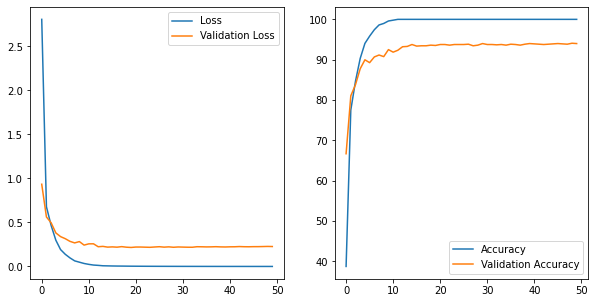

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(resnet_hist.history['loss'], '-', label = 'Loss')
ax1.plot(resnet_hist.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(resnet_hist.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(resnet_hist.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

In [ ]:
pred = resnet_model.predict(x_test)

In [ ]:
pred = np.argmax(pred,axis=1)

In [ ]:
pred.shape

(1056,)

In [ ]:
y_test.shape #(jumlahdata, jumlahkelas)

(1056,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[135,   0,   2,   1,   1,   2,   2,   4],
       [  0, 127,   1,   0,   0,   2,   2,   0],
       [  0,   0, 133,   1,   0,   0,   1,   0],
       [  3,   0,   0, 129,   1,   0,   1,   0],
       [  0,   2,   0,   1, 120,   1,   2,   4],
       [  2,   2,   0,   1,   0, 107,   1,   1],
       [  3,   2,   1,   0,   0,   0, 129,   0],
       [  4,   0,   1,   1,   4,   1,   1, 117]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=lb.classes_))

                  precision    recall  f1-score   support

kue_dadar_gulung       0.92      0.92      0.92       147
   kue_kastengel       0.95      0.96      0.96       132
      kue_klepon       0.96      0.99      0.97       135
       kue_lapis       0.96      0.96      0.96       134
      kue_lumpur       0.95      0.92      0.94       130
 kue_putri_salju       0.95      0.94      0.94       114
     kue_risoles       0.93      0.96      0.94       135
      kue_serabi       0.93      0.91      0.92       129

        accuracy                           0.94      1056
       macro avg       0.94      0.94      0.94      1056
    weighted avg       0.94      0.94      0.94      1056



#DenseNet201 (Tidak Dipakai)

In [ ]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(200, 200, 3),
                                                        pooling='max')
base_densenet_model.trainable=False

74850304/74836368 [==============================] - 3s 0us/step


In [ ]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(8, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    x_train,y_train,epochs=50,
              batch_size=64, verbose=1,
              validation_split=0.3
)

Epoch 1/50
47/47 [==============================] - 36s 498ms/step - loss: 3.7704 - accuracy: 0.2363 - val_loss: 1.8866 - val_accuracy: 0.2904
Epoch 2/50
47/47 [==============================] - 15s 326ms/step - loss: 1.8641 - accuracy: 0.3108 - val_loss: 1.6644 - val_accuracy: 0.3852
Epoch 3/50
47/47 [==============================] - 15s 323ms/step - loss: 1.6626 - accuracy: 0.4008 - val_loss: 1.5837 - val_accuracy: 0.4112
Epoch 4/50
47/47 [==============================] - 15s 320ms/step - loss: 1.5644 - accuracy: 0.4201 - val_loss: 1.5034 - val_accuracy: 0.4270
Epoch 5/50
47/47 [==============================] - 15s 322ms/step - loss: 1.4891 - accuracy: 0.4462 - val_loss: 1.4533 - val_accuracy: 0.4751
Epoch 6/50
47/47 [==============================] - 15s 321ms/step - loss: 1.4409 - accuracy: 0.4770 - val_loss: 1.4112 - val_accuracy: 0.4791
Epoch 7/50
47/47 [==============================] - 15s 322ms/step - loss: 1.3561 - accuracy: 0.5054 - val_loss: 1.3684 - val_accuracy: 0.5051

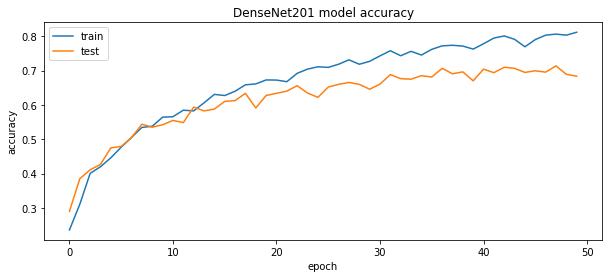

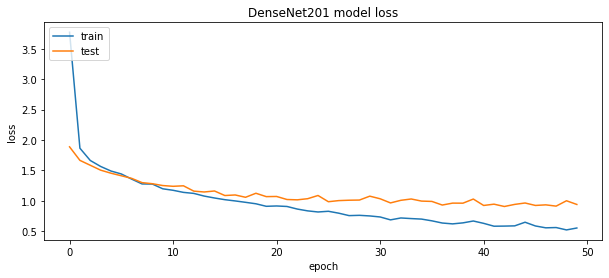

In [ ]:
# Membuat plot akurasi model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('DenseNet201 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print()

# Membuat plot loss model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['loss'])
plt.plot(densenet_hist.history['val_loss'])
plt.title('DenseNet201 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = densenet_model.predict(x_test)

In [ ]:
pred = np.argmax(pred,axis=1)

In [ ]:
pred.shape

(1056,)

In [ ]:
y_test.shape #(jumlahdata, jumlahkelas)

(1056,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[102,   2,   6,  15,  10,   3,   8,   1],
       [  1,  83,   2,   3,   5,   1,  33,   4],
       [  3,   2, 119,   0,   5,   3,   2,   1],
       [ 21,   1,   0,  84,   6,   1,  16,   5],
       [ 11,   6,   4,   5,  78,   1,  19,   6],
       [  3,   7,  11,   1,   4,  79,   7,   2],
       [  0,  10,   1,   4,   3,   1, 114,   2],
       [ 12,   2,   0,   9,  15,   2,   9,  80]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=lb.classes_))

                  precision    recall  f1-score   support

kue_dadar_gulung       0.67      0.69      0.68       147
   kue_kastengel       0.73      0.63      0.68       132
      kue_klepon       0.83      0.88      0.86       135
       kue_lapis       0.69      0.63      0.66       134
      kue_lumpur       0.62      0.60      0.61       130
 kue_putri_salju       0.87      0.69      0.77       114
     kue_risoles       0.55      0.84      0.66       135
      kue_serabi       0.79      0.62      0.70       129

        accuracy                           0.70      1056
       macro avg       0.72      0.70      0.70      1056
    weighted avg       0.72      0.70      0.70      1056



#All CNN's Model

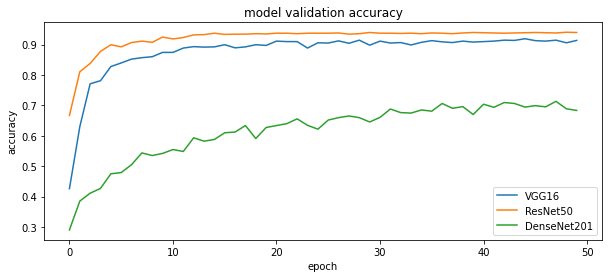

In [ ]:
# Membuat plot akurasi empat model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['VGG16', 'ResNet50', 'DenseNet201'], loc='lower right')
plt.show()

#Grafik Perbandingan VGG16 dan ResNet50

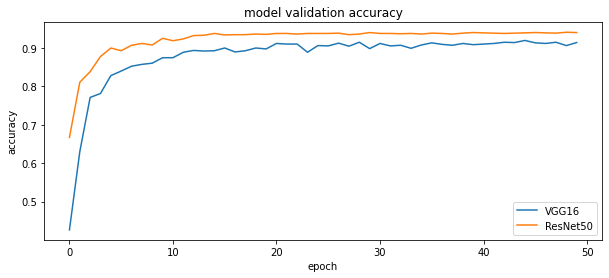

In [ ]:
# Membuat plot akurasi empat model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['VGG16', 'ResNet50'], loc='lower right')
plt.show()

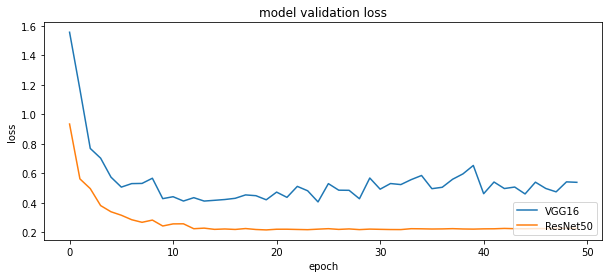

In [ ]:
# Membuat plot loss model VGG16 dan ResNet50
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['val_loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['VGG16', 'ResNet50'], loc='lower right')
plt.show()